In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [37]:
attr_df = pd.read_csv('HR_Employee_Attrition_Data.csv')

In [38]:
attr_df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,1,1,2,94,3,...,1,80,0,8,0,1,6,4,0,5
1,49,0,279,8,1,1,2,3,61,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,1,3,4,92,2,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,1,4,4,56,3,...,3,80,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,5,1,40,3,...,4,80,1,6,3,3,2,2,2,2


In [39]:
attr_df.shape

(2940, 27)

In [40]:
attr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       2940 non-null   int64
 1   Attrition                 2940 non-null   int64
 2   DailyRate                 2940 non-null   int64
 3   DistanceFromHome          2940 non-null   int64
 4   Education                 2940 non-null   int64
 5   EmployeeCount             2940 non-null   int64
 6   EmployeeNumber            2940 non-null   int64
 7   EnvironmentSatisfaction   2940 non-null   int64
 8   HourlyRate                2940 non-null   int64
 9   JobInvolvement            2940 non-null   int64
 10  JobLevel                  2940 non-null   int64
 11  JobSatisfaction           2940 non-null   int64
 12  MonthlyIncome             2940 non-null   int64
 13  MonthlyRate               2940 non-null   int64
 14  NumCompaniesWorked        2940 non-null 

In [41]:
attr_df.isnull().sum().sum()

0

In [42]:
attr_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1470.500000,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,0.367800,403.440447,8.105485,1.023991,0.0,848.849221,1.092896,20.325969,0.711440,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,735.750000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1470.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,2205.250000,4.000000,84.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2940.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [43]:
attr_df.drop(['EmployeeCount','EmployeeNumber'], axis=1, inplace=True)

In [44]:
attr_df['Attrition'].sum()/2940

0.16122448979591836

In [45]:
attr_df.Attrition.value_counts(normalize=True)

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

In [46]:
# plt.figure(figsize=(15,20))
# sns.boxplot(data=attr_df, orient='h')

<AxesSubplot:>

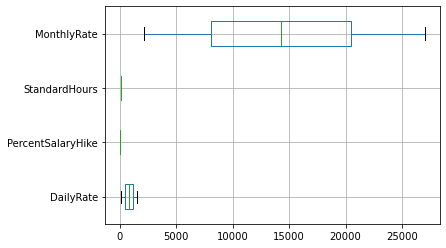

In [47]:
attr_df[['DailyRate','PercentSalaryHike','StandardHours','MonthlyRate']].boxplot(vert=0)

<AxesSubplot:>

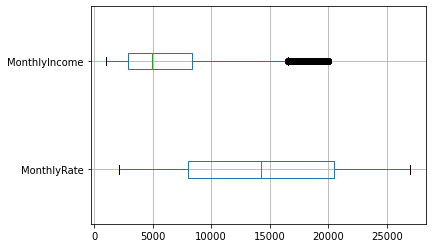

In [48]:
attr_df[['MonthlyRate','MonthlyIncome']].boxplot(vert=0)

<AxesSubplot:>

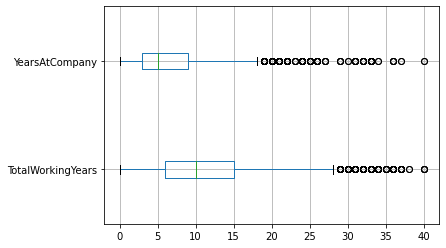

In [49]:
attr_df[['TotalWorkingYears','YearsAtCompany']].boxplot(vert=0)

In [50]:
from sklearn.model_selection import train_test_split
# Extract x & y

x = attr_df.drop(['Attrition'], axis=1)
y = attr_df.pop('Attrition')

In [51]:
#split data into 70% training and 30% test data
x_train, x_test, train_labels, test_labels = train_test_split(x,y, test_size=0.30, random_state=1)

In [52]:
print(x_train.shape)
print(x_test.shape)
print(train_labels.shape)
print(test_labels.shape)

(2058, 24)
(882, 24)
(2058,)
(882,)


In [53]:
# Decision Tree Classifier

In [54]:
dt_model = DecisionTreeClassifier(criterion='gini')

In [55]:
dt_model.fit(x_train, train_labels)

DecisionTreeClassifier()

In [56]:
from sklearn import tree

In [57]:
train_char_label = ['No','Yes']
HR_Tree_File = open('hr_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=HR_Tree_File,
                                feature_names=list(x_train), 
                                class_names=list(train_char_label))

HR_Tree_File.close()

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
# 1st Option
param_grid = {
    'max_depth': [5,6,7,8,9,10,11,12],
    'min_samples_leaf': [15,20,25,30],
    'min_samples_split': [50,60,75,90]
}

In [60]:
dt_model = DecisionTreeClassifier()

In [61]:
grid_search = GridSearchCV(estimator=dt_model, param_grid = param_grid, cv=3)

In [62]:
grid_search.fit(x_train, train_labels)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12],
                         'min_samples_leaf': [15, 20, 25, 30],
                         'min_samples_split': [50, 60, 75, 90]})

In [63]:
grid_search.best_params_

{'max_depth': 6, 'min_samples_leaf': 20, 'min_samples_split': 50}

In [64]:
best_grid = grid_search.best_estimator_

In [65]:
ytrain_predict = best_grid.predict(x_train)

In [66]:
ytest_predict = best_grid.predict(x_test)

In [67]:
from sklearn.metrics import classification_report
# 1stway: to provide more parameters in param_grid to determine best combination

In [68]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93      1737
           1       0.67      0.30      0.41       321

    accuracy                           0.87      2058
   macro avg       0.78      0.63      0.67      2058
weighted avg       0.85      0.87      0.85      2058



In [69]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       729
           1       0.53      0.20      0.29       153

    accuracy                           0.83       882
   macro avg       0.69      0.58      0.60       882
weighted avg       0.80      0.83      0.80       882



In [70]:
# 2nd Option
ytrain_predict_score = best_grid.predict_proba(x_train)
ytest_predict_score = best_grid.predict_proba(x_test)

In [71]:
ytrain_predict_score[:,1]

array([0.        , 0.0035461 , 0.0952381 , ..., 0.06590258, 0.0035461 ,
       0.13953488])

In [72]:
# RF Classifier

In [73]:
param_grid = {
    'max_depth': [5,6,7],
    'max_features': [6,10, 14],
    'min_samples_leaf': [10,15,20],
    'min_samples_split': [30,40,50],
    'n_estimators': [201,301,401]
}
rfcl = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rfcl, param_grid=param_grid, cv=3)

In [74]:
grid_search.fit(x_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 6, 7], 'max_features': [6, 10, 14],
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': [30, 40, 50],
                         'n_estimators': [201, 301, 401]})

In [75]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 14,
 'min_samples_leaf': 10,
 'min_samples_split': 30,
 'n_estimators': 201}

In [76]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=7, max_features=14, min_samples_leaf=10,
                       min_samples_split=30, n_estimators=201)

In [77]:
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

In [274]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      1.00      0.92      1737
           1       0.00      0.00      0.00       321

    accuracy                           0.84      2058
   macro avg       0.42      0.50      0.46      2058
weighted avg       0.71      0.84      0.77      2058



C:\Users\guptap6\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\guptap6\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\guptap6\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [275]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       729
           1       0.00      0.00      0.00       153

    accuracy                           0.83       882
   macro avg       0.41      0.50      0.45       882
weighted avg       0.68      0.83      0.75       882



C:\Users\guptap6\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\guptap6\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\guptap6\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [276]:
# MLP Classifier

In [256]:
# Scaling variables
from sklearn.preprocessing import StandardScaler

In [257]:
sc = StandardScaler()
x_trains = sc. fit_transform(x_train)

In [258]:
x_tests = sc.transform(x_test)

In [259]:
x_trains

array([[ 1.75904517,  1.04289644, -0.27238444, ...,  0.76397248,
         0.56720724,  0.82525338],
       [ 0.2198339 , -1.64621765, -0.76671175, ..., -0.33955822,
         0.25683434,  0.54043509],
       [-0.10999708, -0.5899575 ,  1.08701567, ..., -1.16720624,
        -0.67428439, -1.16847464],
       ...,
       [ 0.32977756,  0.23516808, -0.39596627, ...,  0.76397248,
         1.49832597,  0.82525338],
       [ 0.65960855,  0.57317133,  0.83985201, ...,  2.41926852,
        -0.36391148,  1.39488995],
       [-1.42932103,  0.06616646,  0.46910653, ..., -1.16720624,
        -0.67428439, -1.16847464]])

In [260]:
x_train

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
858,53,1223,7,2,4,50,3,5,3,18606,...,2,80,1,26,6,3,7,7,4,7
551,39,141,3,3,3,44,4,2,2,6389,...,3,80,1,12,3,1,8,3,3,6
1768,36,566,18,4,3,81,4,1,4,3688,...,4,80,2,4,2,3,1,0,0,0
2830,31,471,4,3,1,62,4,1,3,3978,...,2,80,1,4,0,2,2,2,2,2
2703,30,793,16,1,2,33,3,1,4,2862,...,2,80,1,10,2,2,10,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,43,343,9,3,1,52,3,1,3,2438,...,3,80,0,7,2,2,3,2,1,2
905,29,694,1,3,4,87,2,4,4,16124,...,2,80,2,9,2,2,7,7,1,7
1096,40,898,6,2,3,38,3,4,4,16437,...,4,80,0,21,2,3,21,7,7,7
235,43,1034,16,3,4,80,3,4,4,16064,...,3,80,1,22,3,3,17,13,1,9


In [261]:
param_grid ={
    'hidden_layer_sizes': [(100,100,100)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd','adam'],
    'tol': [0.1, 0.01],
    'max_iter': [100000]
}

# Building Neural Network Model

rfcl = MLPClassifier()
grid_search = GridSearchCV(estimator=rfcl, param_grid=param_grid, cv=3)

In [262]:
grid_search.fit(x_train, train_labels)

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(100, 100, 100)],
                         'max_iter': [100000], 'solver': ['sgd', 'adam'],
                         'tol': [0.1, 0.01]})

In [263]:
grid_search.best_params_

{'activation': 'logistic',
 'hidden_layer_sizes': (100, 100, 100),
 'max_iter': 100000,
 'solver': 'sgd',
 'tol': 0.1}

In [264]:
best_grid =  grid_search.best_estimator_

In [265]:
ytrain_predict = best_grid.predict(x_trains)

In [266]:
ytest_predict =  best_grid.predict(x_test)

In [267]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      1.00      0.92      1737
           1       0.00      0.00      0.00       321

    accuracy                           0.84      2058
   macro avg       0.42      0.50      0.46      2058
weighted avg       0.71      0.84      0.77      2058



C:\Users\guptap6\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\guptap6\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\guptap6\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [268]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       729
           1       0.00      0.00      0.00       153

    accuracy                           0.83       882
   macro avg       0.41      0.50      0.45       882
weighted avg       0.68      0.83      0.75       882



C:\Users\guptap6\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\guptap6\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\guptap6\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
